In [1]:
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# import pickle as pk
import numpy as np
import torch
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)
dev = torch.device(device)
import torch.optim as optim
import sys, os
from tqdm import tqdm

import yaml
import matplotlib
import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
%matplotlib inline
import yaml


# autoreload modules
%load_ext autoreload
%autoreload 2

import matplotlib
%matplotlib inline



cuda


In [2]:
from tqdm import tqdm
import pickle as pk
ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_charm_truth/'
isim_array = np.arange(1800,2000)
# isim_array = np.arange(0,)
pos = 'real'
for ji in tqdm(range(len(isim_array))):
    isim = isim_array[ji]
    try:
        saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_nbar_4en4.pk', 'rb'))    
        # saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_lgMmin_13p0.pk', 'rb'))            
        if ji == 0:
            Pk_mock_all = saved_j[pos + '_Pk_mock_weighted'][None,:,:]
            Pk_truth_all = saved_j[pos + '_Pk_truth_weighted'][None,:,:]            

            Bk_mock_lowk_all = saved_j[pos + '_Bk_mock_k0p06_weighted'][None,:]
            # Bk_mock_highk_all = saved_j['Bk_mock_k0p3_weighted'][None,:]
            Bk_mock_highk_all = saved_j[pos + '_Bk_mock_k0p2_weighted'][None,:]

            Bk_truth_lowk_all = saved_j[pos + '_Bk_truth_k0p06_weighted'][None,:]
            # Bk_truth_highk_all = saved_j['Bk_truth_k0p3_weighted'][None,:]
            Bk_truth_highk_all = saved_j[pos + '_Bk_truth_k0p2_weighted'][None,:]

            # wavelet_s0_mock_all = saved_j['s0_mock_weighted'][None,:]
            # wavelet_s0_truth_all = saved_j['s0_truth_weighted'][None,:]

            wavelet_s0_mock_all = saved_j[pos + '_s1_mock_weighted'][None,:]
            wavelet_s0_truth_all = saved_j[pos + 's1_truth_weighted'][None,:]

            cosmo_all = saved_j['cosmo'][None, :]


        else:
            Pk_mock_all = np.concatenate((Pk_mock_all, saved_j[pos + '_Pk_mock_weighted'][None,:,:]), axis=0)
            Pk_truth_all = np.concatenate((Pk_truth_all, saved_j[pos + '_Pk_truth_weighted'][None,:,:]), axis=0)

            Bk_mock_lowk_all = np.concatenate((Bk_mock_lowk_all, saved_j[pos + '_Bk_mock_k0p06_weighted'][None,:]), axis=0)
            # Bk_mock_highk_all = np.concatenate((Bk_mock_highk_all, saved_j['Bk_mock_k0p3_weighted'][None,:]), axis=0)
            Bk_mock_highk_all = np.concatenate((Bk_mock_highk_all, saved_j[pos + '_Bk_mock_k0p2_weighted'][None,:]), axis=0)

            Bk_truth_lowk_all = np.concatenate((Bk_truth_lowk_all, saved_j[pos + '_Bk_truth_k0p06_weighted'][None,:]), axis=0)
            # Bk_truth_highk_all = np.concatenate((Bk_truth_highk_all, saved_j['Bk_truth_k0p3_weighted'][None,:]), axis=0)
            Bk_truth_highk_all = np.concatenate((Bk_truth_highk_all, saved_j[pos + '_Bk_truth_k0p2_weighted'][None,:]), axis=0)

            # wavelet_s0_mock_all = np.concatenate((wavelet_s0_mock_all, saved_j['s0_mock_weighted'][None,:]), axis=0)
            # wavelet_s0_truth_all = np.concatenate((wavelet_s0_truth_all, saved_j['s0_truth_weighted'][None,:]), axis=0)

            wavelet_s0_mock_all = np.concatenate((wavelet_s0_mock_all, saved_j[pos + '_s1_mock_weighted'][None,:]), axis=0)
            wavelet_s0_truth_all = np.concatenate((wavelet_s0_truth_all, saved_j[pos + 's1_truth_weighted'][None,:]), axis=0)

            cosmo_all = np.concatenate((cosmo_all, saved_j['cosmo'][None, :]), axis=0)


    except Exception as e:
        # print(e)
        pass




  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:04<00:00, 45.39it/s]


In [3]:
# saved_j.keys()
Pk_mock_all.shape


(200, 17, 3)

In [18]:
indsel = np.arange(0, Pk_mock_all.shape[0], 1)

# mean_Pk_resid = np.mean(np.abs(-1 + Pk_mock_all/Pk_truth_all), axis=1)
# # indsel = np.where(mean_Pk_resid < 0.029)[0]
# indsel = np.where(mean_Pk_resid < 0.05)[0]
# print(indsel)



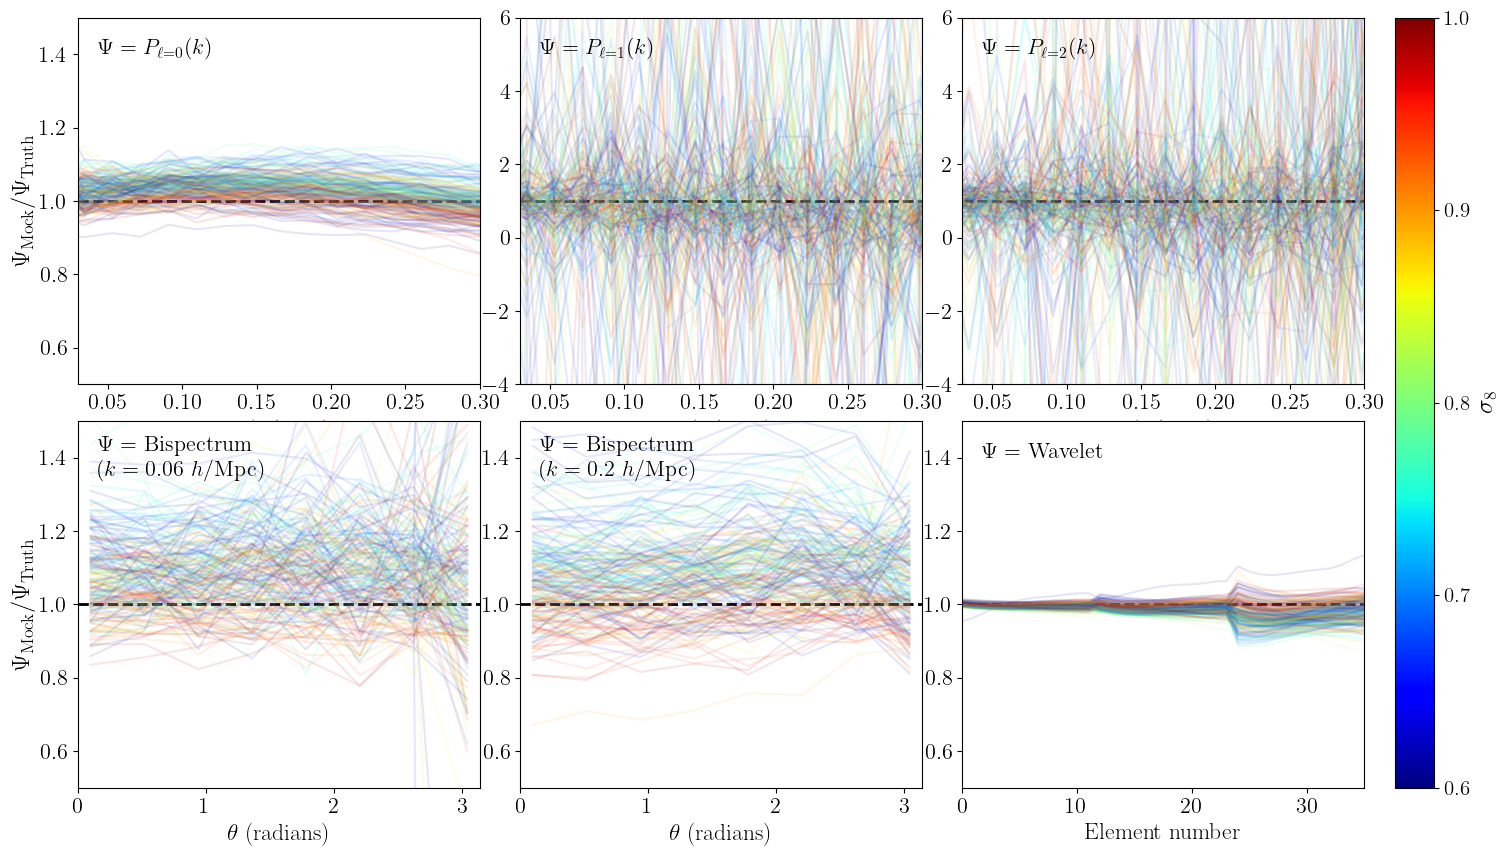

In [22]:
from matplotlib import cm

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=0.6, vmax=1.0)

fig, axes_all = pl.subplots(2, 3, figsize=(20, 10))
# reduce the spacing between panels:
pl.subplots_adjust(wspace=0.1, hspace=0.1)


for j1 in range(2):
    axes = axes_all[j1]
    for i in range(3):
        axes[i].axhline(1, color='k', ls='--', lw=2.0)
        if j1 == 0:

            for ji, j in enumerate(indsel):
                sigma8_ji = cosmo_all[ji][-1]
                color_ji = cm.jet(norm(sigma8_ji)) 
                axes[i].plot(saved_j[pos + '_k_Pk_weighted'], Pk_mock_all[j,:, i]/Pk_truth_all[j,:, i], color=color_ji, alpha=0.1)
                if ji == 0:
                    # axes[i].fill_between(saved_j['k_Pk_weighted'], 1-Pk_truth_all_fid_ratio_std, 1+Pk_truth_all_fid_ratio_std, alpha=0.2, color='k')
                    # axes[i].set_xscale('log')
                    if i == 0:
                        axes[i].set_ylim(0.5, 1.5)     
                    else:
                        axes[i].set_ylim(-4.0, 6.0)     
                    axes[i].set_xlim(0.03, 0.3)        
                    # axes[i].set_xticks([0.03, 0.1, 0.2, 0.3], ['0.03', '0.1', '0.2', '0.3'])    
                    # axes[i].set_xticks([])
                    axes[i].set_xlabel(r'$k$  ($h$/Mpc)', size=17)

                    if i == 0:
                        label = r'$\Psi = P_{\ell = 0}(k)$'
                    if i == 1:
                        label = r'$\Psi = P_{\ell = 1}(k)$'
                    if i == 2:
                        label = r'$\Psi = P_{\ell = 2}(k)$'
                    
                    axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=16)
                    if i == 0:
                        axes[i].set_ylabel(r'$\Psi_{\rm Mock}/\Psi_{\rm Truth}$', size=18)

                
        if j1 == 1:
            if i == 0:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    axes[i].plot(saved_j['theta'], Bk_mock_lowk_all[j,:]/Bk_truth_lowk_all[j,:], color=color_ji, alpha=0.1)
                    if ji == 0:            
                        # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_lowk_all_fid_ratio_std, 1+Bk_truth_lowk_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.5, 1.5)  
                        axes[i].set_xlim(0.0, 3.14)            
                        axes[i].set_xlabel(r'$\theta$ (radians)', size=17)

                        label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.06$ $h/$Mpc)'
                        axes[i].text(0.05, 0.85, label, transform=axes[i].transAxes, fontsize=16)
                        if i == 0:
                            axes[i].set_ylabel(r'$\Psi_{\rm Mock}/\Psi_{\rm Truth}$', size=18)


            if i == 1:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    axes[i].plot(saved_j['theta'], Bk_mock_highk_all[j,:]/Bk_truth_highk_all[j,:], color=color_ji, alpha=0.1)
                    if ji == 0:
                        # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_highk_all_fid_ratio_std, 1+Bk_truth_highk_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.5, 1.5)    
                        axes[i].set_xlim(0.0, 3.14)                
                        axes[i].set_xlabel(r'$\theta$ (radians)', size=17)

                        label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.2$ $h/$Mpc)'
                        axes[i].text(0.05, 0.85, label, transform=axes[i].transAxes, fontsize=16)


            if i == 2:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    # axes[i].plot(np.arange(wavelet_s0_mock_all.shape[1]), wavelet_s0_mock_all[j,:]/wavelet_s0_truth_all[j,:], 'b', alpha=0.1)
                    axes[i].plot(np.arange(wavelet_s0_mock_all.shape[1]), wavelet_s0_truth_all[j,:]/wavelet_s0_mock_all[j,:], color=color_ji, alpha=0.1)            
                    if ji == 0:
                        # axes[i].fill_between(np.arange(wavelet_s0_mock_all.shape[1]), 1-wavelet_s0_truth_all_fid_ratio_std, 1+wavelet_s0_truth_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.5, 1.5)       
                        axes[i].set_xlim(0, 35)             
                        axes[i].set_xlabel('Element number', size=17)

                        label = r'$\Psi = $ Wavelet'
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=16)



        axes[i].tick_params(axis='both', which='major', labelsize=16)
        axes[i].tick_params(axis='both', which='minor', labelsize=16)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes_all, label=r'$\sigma_8$', pad=0.02)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_ticks(np.arange(0.6, 1.01, 0.1))
    # 
fig.savefig('/mnt/home/spandey/ceph/CHARM/results/stat_pred.pdf', bbox_inches='tight')




In [9]:
# axes_all.shape
axes.shape


(3,)

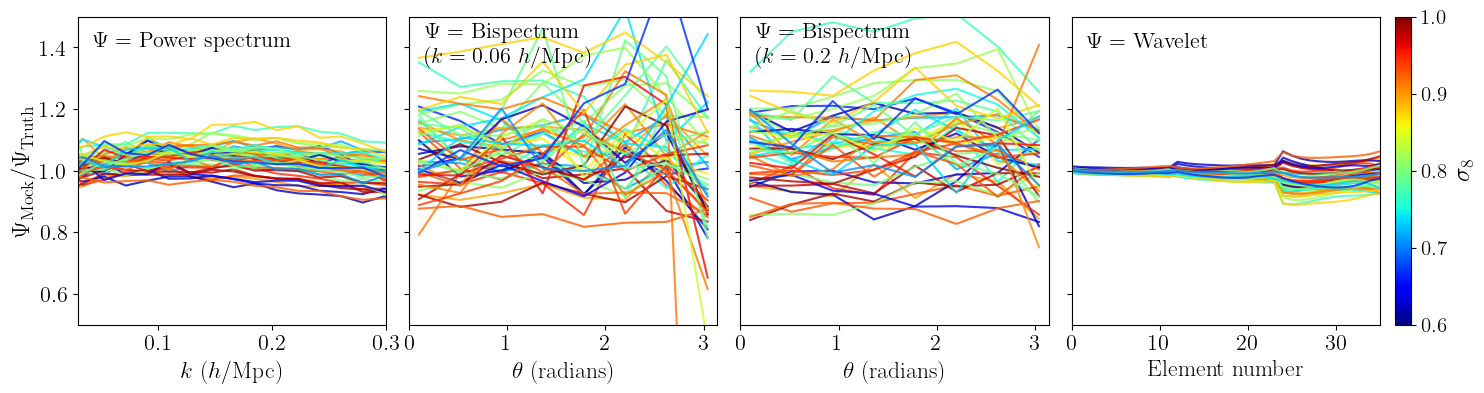

In [74]:
from matplotlib import cm

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=0.6, vmax=1.0)

fig, axes = pl.subplots(1, 4, figsize=(20, 4), sharey=True)
# reduce the spacing between panels:
pl.subplots_adjust(wspace=0.075, hspace=0.05)



for i in range(4):
    
    if i == 0:
        for ji, j in enumerate(indsel):
            sigma8_ji = cosmo_all[ji][-1]
            color_ji = cm.jet(norm(sigma8_ji)) 
            axes[i].plot(saved_j[pos + '_k_Pk_weighted'], Pk_mock_all[j,:]/Pk_truth_all[j,:], color=color_ji, alpha=0.8)
            if ji == 0:
                # axes[i].fill_between(saved_j['k_Pk_weighted'], 1-Pk_truth_all_fid_ratio_std, 1+Pk_truth_all_fid_ratio_std, alpha=0.2, color='k')
                # axes[i].set_xscale('log')
                axes[i].set_ylim(0.5, 1.5)     
                axes[i].set_xlim(0.03, 0.3)        
                # axes[i].set_xticks([0.03, 0.1, 0.2, 0.3], ['0.03', '0.1', '0.2', '0.3'])    
                # axes[i].set_xticks([])
                axes[i].set_xlabel(r'$k$  ($h$/Mpc)', size=17)

                label = r'$\Psi = $ Power spectrum'
                axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=16)

                axes[i].set_ylabel(r'$\Psi_{\rm Mock}/\Psi_{\rm Truth}$', size=18)

            

    if i == 1:
        for ji, j in enumerate(indsel):
            sigma8_ji = cosmo_all[ji][-1]
            color_ji = cm.jet(norm(sigma8_ji)) 

            axes[i].plot(saved_j['theta'], Bk_mock_lowk_all[j,:]/Bk_truth_lowk_all[j,:], color=color_ji, alpha=0.8)
            if ji == 0:            
                # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_lowk_all_fid_ratio_std, 1+Bk_truth_lowk_all_fid_ratio_std, alpha=0.2, color='k')
                axes[i].set_ylim(0.5, 1.5)  
                axes[i].set_xlim(0.0, 3.14)            
                axes[i].set_xlabel(r'$\theta$ (radians)', size=17)

                label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.06$ $h/$Mpc)'
                axes[i].text(0.05, 0.85, label, transform=axes[i].transAxes, fontsize=16)


    if i == 2:
        for ji, j in enumerate(indsel):
            sigma8_ji = cosmo_all[ji][-1]
            color_ji = cm.jet(norm(sigma8_ji)) 

            axes[i].plot(saved_j['theta'], Bk_mock_highk_all[j,:]/Bk_truth_highk_all[j,:], color=color_ji, alpha=0.8)
            if ji == 0:
                # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_highk_all_fid_ratio_std, 1+Bk_truth_highk_all_fid_ratio_std, alpha=0.2, color='k')
                axes[i].set_ylim(0.5, 1.5)    
                axes[i].set_xlim(0.0, 3.14)                
                axes[i].set_xlabel(r'$\theta$ (radians)', size=17)

                label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.2$ $h/$Mpc)'
                axes[i].text(0.05, 0.85, label, transform=axes[i].transAxes, fontsize=16)


    if i == 3:
        for ji, j in enumerate(indsel):
            sigma8_ji = cosmo_all[ji][-1]
            color_ji = cm.jet(norm(sigma8_ji)) 

            # axes[i].plot(np.arange(wavelet_s0_mock_all.shape[1]), wavelet_s0_mock_all[j,:]/wavelet_s0_truth_all[j,:], 'b', alpha=0.1)
            axes[i].plot(np.arange(wavelet_s0_mock_all.shape[1]), wavelet_s0_truth_all[j,:]/wavelet_s0_mock_all[j,:], color=color_ji, alpha=0.8)            
            if ji == 0:
                # axes[i].fill_between(np.arange(wavelet_s0_mock_all.shape[1]), 1-wavelet_s0_truth_all_fid_ratio_std, 1+wavelet_s0_truth_all_fid_ratio_std, alpha=0.2, color='k')
                axes[i].set_ylim(0.5, 1.5)       
                axes[i].set_xlim(0, 35)             
                axes[i].set_xlabel('Element number', size=17)

                label = r'$\Psi = $ Wavelet'
                axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=16)



    axes[i].tick_params(axis='both', which='major', labelsize=16)
    axes[i].tick_params(axis='both', which='minor', labelsize=16)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$\sigma_8$', pad=0.01)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_ticks(np.arange(0.6, 1.01, 0.1))
# 
# fig.savefig('/mnt/home/spandey/ceph/AR_NPE/notebooks/CMASS_TEST/run_inference_scripts/results/stat_pred.pdf', bbox_inches='tight')




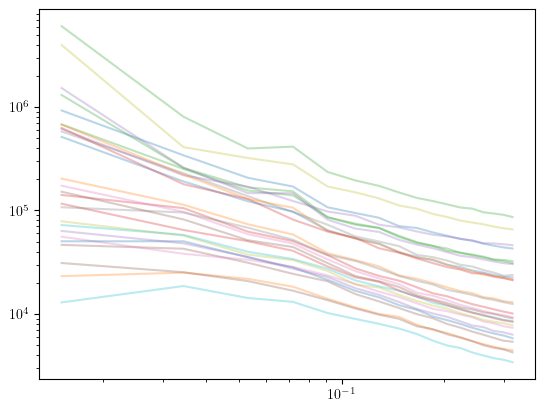

In [66]:
pl.figure()
for j in range(len(indsel)):
    pl.plot(saved_j[pos + '_k_Pk_weighted'], Pk_truth_all[j,:], alpha=0.3)
pl.xscale('log')
pl.yscale('log')



In [4]:
from tqdm import tqdm
import pickle as pk
ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_charm_truth_nsubv_vel_10k/'
isim_array = np.arange(1800,2000)
# isim_array = np.arange(0,)
pos = 'rsd'
for ji in tqdm(range(len(isim_array))):
    isim = isim_array[ji]
    try:
        saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_nbar_4en4.pk', 'rb'))    
        # saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_lgMmin_13p0.pk', 'rb'))            
        if ji == 0:
            Pk_mock_all = saved_j[pos + '_Pk_mock_weighted'][None,:,:]
            Pk_truth_all = saved_j[pos + '_Pk_truth_weighted'][None,:,:]            

            Bk_mock_lowk_all = saved_j[pos + '_Bk_mock_k0p06_weighted'][None,:]
            # Bk_mock_highk_all = saved_j['Bk_mock_k0p3_weighted'][None,:]
            Bk_mock_highk_all = saved_j[pos + '_Bk_mock_k0p2_weighted'][None,:]

            Bk_truth_lowk_all = saved_j[pos + '_Bk_truth_k0p06_weighted'][None,:]
            # Bk_truth_highk_all = saved_j['Bk_truth_k0p3_weighted'][None,:]
            Bk_truth_highk_all = saved_j[pos + '_Bk_truth_k0p2_weighted'][None,:]

            # wavelet_s0_mock_all = saved_j['s0_mock_weighted'][None,:]
            # wavelet_s0_truth_all = saved_j['s0_truth_weighted'][None,:]

            wavelet_s0_mock_all = saved_j[pos + '_s1_mock_weighted'][None,:]
            wavelet_s0_truth_all = saved_j[pos + 's1_truth_weighted'][None,:]

            cosmo_all = saved_j['cosmo'][None, :]


        else:
            Pk_mock_all = np.concatenate((Pk_mock_all, saved_j[pos + '_Pk_mock_weighted'][None,:,:]), axis=0)
            Pk_truth_all = np.concatenate((Pk_truth_all, saved_j[pos + '_Pk_truth_weighted'][None,:,:]), axis=0)

            Bk_mock_lowk_all = np.concatenate((Bk_mock_lowk_all, saved_j[pos + '_Bk_mock_k0p06_weighted'][None,:]), axis=0)
            # Bk_mock_highk_all = np.concatenate((Bk_mock_highk_all, saved_j['Bk_mock_k0p3_weighted'][None,:]), axis=0)
            Bk_mock_highk_all = np.concatenate((Bk_mock_highk_all, saved_j[pos + '_Bk_mock_k0p2_weighted'][None,:]), axis=0)

            Bk_truth_lowk_all = np.concatenate((Bk_truth_lowk_all, saved_j[pos + '_Bk_truth_k0p06_weighted'][None,:]), axis=0)
            # Bk_truth_highk_all = np.concatenate((Bk_truth_highk_all, saved_j['Bk_truth_k0p3_weighted'][None,:]), axis=0)
            Bk_truth_highk_all = np.concatenate((Bk_truth_highk_all, saved_j[pos + '_Bk_truth_k0p2_weighted'][None,:]), axis=0)

            # wavelet_s0_mock_all = np.concatenate((wavelet_s0_mock_all, saved_j['s0_mock_weighted'][None,:]), axis=0)
            # wavelet_s0_truth_all = np.concatenate((wavelet_s0_truth_all, saved_j['s0_truth_weighted'][None,:]), axis=0)

            wavelet_s0_mock_all = np.concatenate((wavelet_s0_mock_all, saved_j[pos + '_s1_mock_weighted'][None,:]), axis=0)
            wavelet_s0_truth_all = np.concatenate((wavelet_s0_truth_all, saved_j[pos + 's1_truth_weighted'][None,:]), axis=0)

            cosmo_all = np.concatenate((cosmo_all, saved_j['cosmo'][None, :]), axis=0)


    except Exception as e:
        # print(e)
        pass




  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:04<00:00, 47.50it/s]


In [5]:
indsel = np.arange(0, Pk_mock_all.shape[0], 1)
print(len(indsel))


200


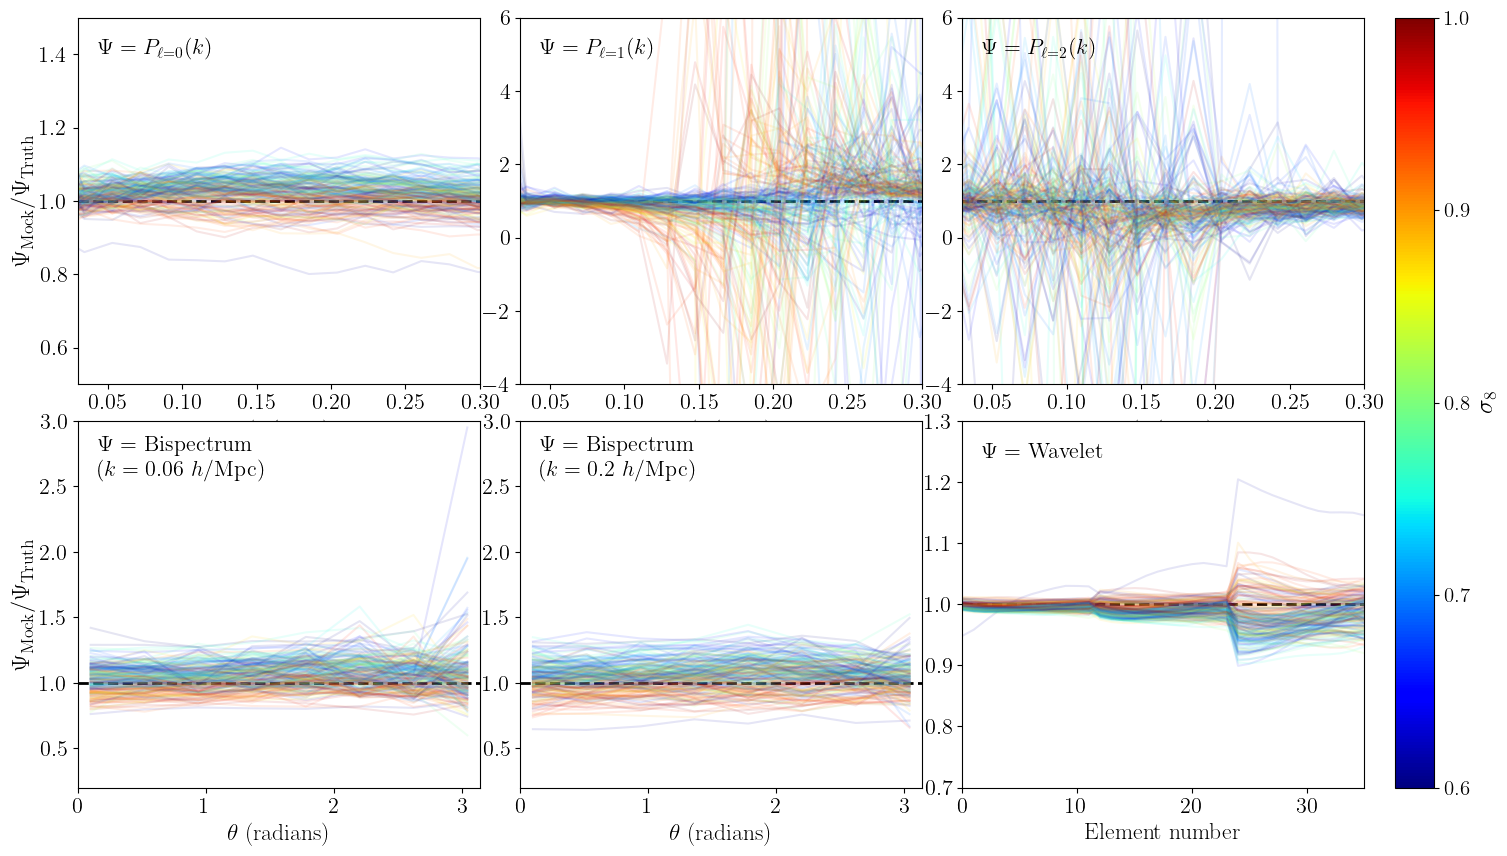

In [7]:
indsel = np.arange(0, Pk_mock_all.shape[0], 1)

from matplotlib import cm

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=0.6, vmax=1.0)

fig, axes_all = pl.subplots(2, 3, figsize=(20, 10))
# reduce the spacing between panels:
pl.subplots_adjust(wspace=0.1, hspace=0.1)


for j1 in range(2):
    axes = axes_all[j1]
    for i in range(3):
        axes[i].axhline(1, color='k', ls='--', lw=2.0)
        if j1 == 0:

            for ji, j in enumerate(indsel):
                sigma8_ji = cosmo_all[ji][-1]
                color_ji = cm.jet(norm(sigma8_ji)) 
                axes[i].plot(saved_j[pos + '_k_Pk_weighted'], Pk_mock_all[j,:, i]/Pk_truth_all[j,:, i], color=color_ji, alpha=0.1)
                if ji == 0:
                    # axes[i].fill_between(saved_j['k_Pk_weighted'], 1-Pk_truth_all_fid_ratio_std, 1+Pk_truth_all_fid_ratio_std, alpha=0.2, color='k')
                    # axes[i].set_xscale('log')
                    if i == 0:
                        axes[i].set_ylim(0.5, 1.5)     
                    else:
                        axes[i].set_ylim(-4.0, 6.0)     
                    axes[i].set_xlim(0.03, 0.3)        
                    # axes[i].set_xticks([0.03, 0.1, 0.2, 0.3], ['0.03', '0.1', '0.2', '0.3'])    
                    # axes[i].set_xticks([])
                    axes[i].set_xlabel(r'$k$  ($h$/Mpc)', size=17)

                    if i == 0:
                        label = r'$\Psi = P_{\ell = 0}(k)$'
                    if i == 1:
                        label = r'$\Psi = P_{\ell = 1}(k)$'
                    if i == 2:
                        label = r'$\Psi = P_{\ell = 2}(k)$'
                    
                    axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=16)
                    if i == 0:
                        axes[i].set_ylabel(r'$\Psi_{\rm Mock}/\Psi_{\rm Truth}$', size=18)

                
        if j1 == 1:
            if i == 0:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    axes[i].plot(saved_j['theta'], Bk_mock_lowk_all[j,:]/Bk_truth_lowk_all[j,:], color=color_ji, alpha=0.1)
                    if ji == 0:            
                        # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_lowk_all_fid_ratio_std, 1+Bk_truth_lowk_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.2, 3.0)     
                        axes[i].set_xlim(0.0, 3.14)            
                        axes[i].set_xlabel(r'$\theta$ (radians)', size=17)

                        label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.06$ $h/$Mpc)'
                        axes[i].text(0.05, 0.85, label, transform=axes[i].transAxes, fontsize=16)
                        if i == 0:
                            axes[i].set_ylabel(r'$\Psi_{\rm Mock}/\Psi_{\rm Truth}$', size=18)


            if i == 1:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    axes[i].plot(saved_j['theta'], Bk_mock_highk_all[j,:]/Bk_truth_highk_all[j,:], color=color_ji, alpha=0.1)
                    if ji == 0:
                        # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_highk_all_fid_ratio_std, 1+Bk_truth_highk_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.2, 3.0)    
                        axes[i].set_xlim(0.0, 3.14)                
                        axes[i].set_xlabel(r'$\theta$ (radians)', size=17)

                        label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.2$ $h/$Mpc)'
                        axes[i].text(0.05, 0.85, label, transform=axes[i].transAxes, fontsize=16)


            if i == 2:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    # axes[i].plot(np.arange(wavelet_s0_mock_all.shape[1]), wavelet_s0_mock_all[j,:]/wavelet_s0_truth_all[j,:], 'b', alpha=0.1)
                    axes[i].plot(np.arange(wavelet_s0_mock_all.shape[1]), wavelet_s0_truth_all[j,:]/wavelet_s0_mock_all[j,:], color=color_ji, alpha=0.1)            
                    if ji == 0:
                        # axes[i].fill_between(np.arange(wavelet_s0_mock_all.shape[1]), 1-wavelet_s0_truth_all_fid_ratio_std, 1+wavelet_s0_truth_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.7, 1.3)       
                        axes[i].set_xlim(0, 35)             
                        axes[i].set_xlabel('Element number', size=17)

                        label = r'$\Psi = $ Wavelet'
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=16)



        axes[i].tick_params(axis='both', which='major', labelsize=16)
        axes[i].tick_params(axis='both', which='minor', labelsize=16)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes_all, label=r'$\sigma_8$', pad=0.02)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_ticks(np.arange(0.6, 1.01, 0.1))
    # 
# fig.savefig('/mnt/home/spandey/ceph/CHARM/results/stat_pred_resid_v2.pdf', bbox_inches='tight')




In [50]:
# np.corr()
indk = 5
jl = 0
ratio_all = Pk_mock_all[:,indk, jl]/Pk_truth_all[:,indk, jl]
sig8_all = cosmo_all[:,-1]

# print(ratio_all.shape, sig8_all.shape)
np.corrcoef(cosmo_all[:,0], ratio_all)


array([[ 1.        , -0.19160342],
       [-0.19160342,  1.        ]])